Final Dashboard

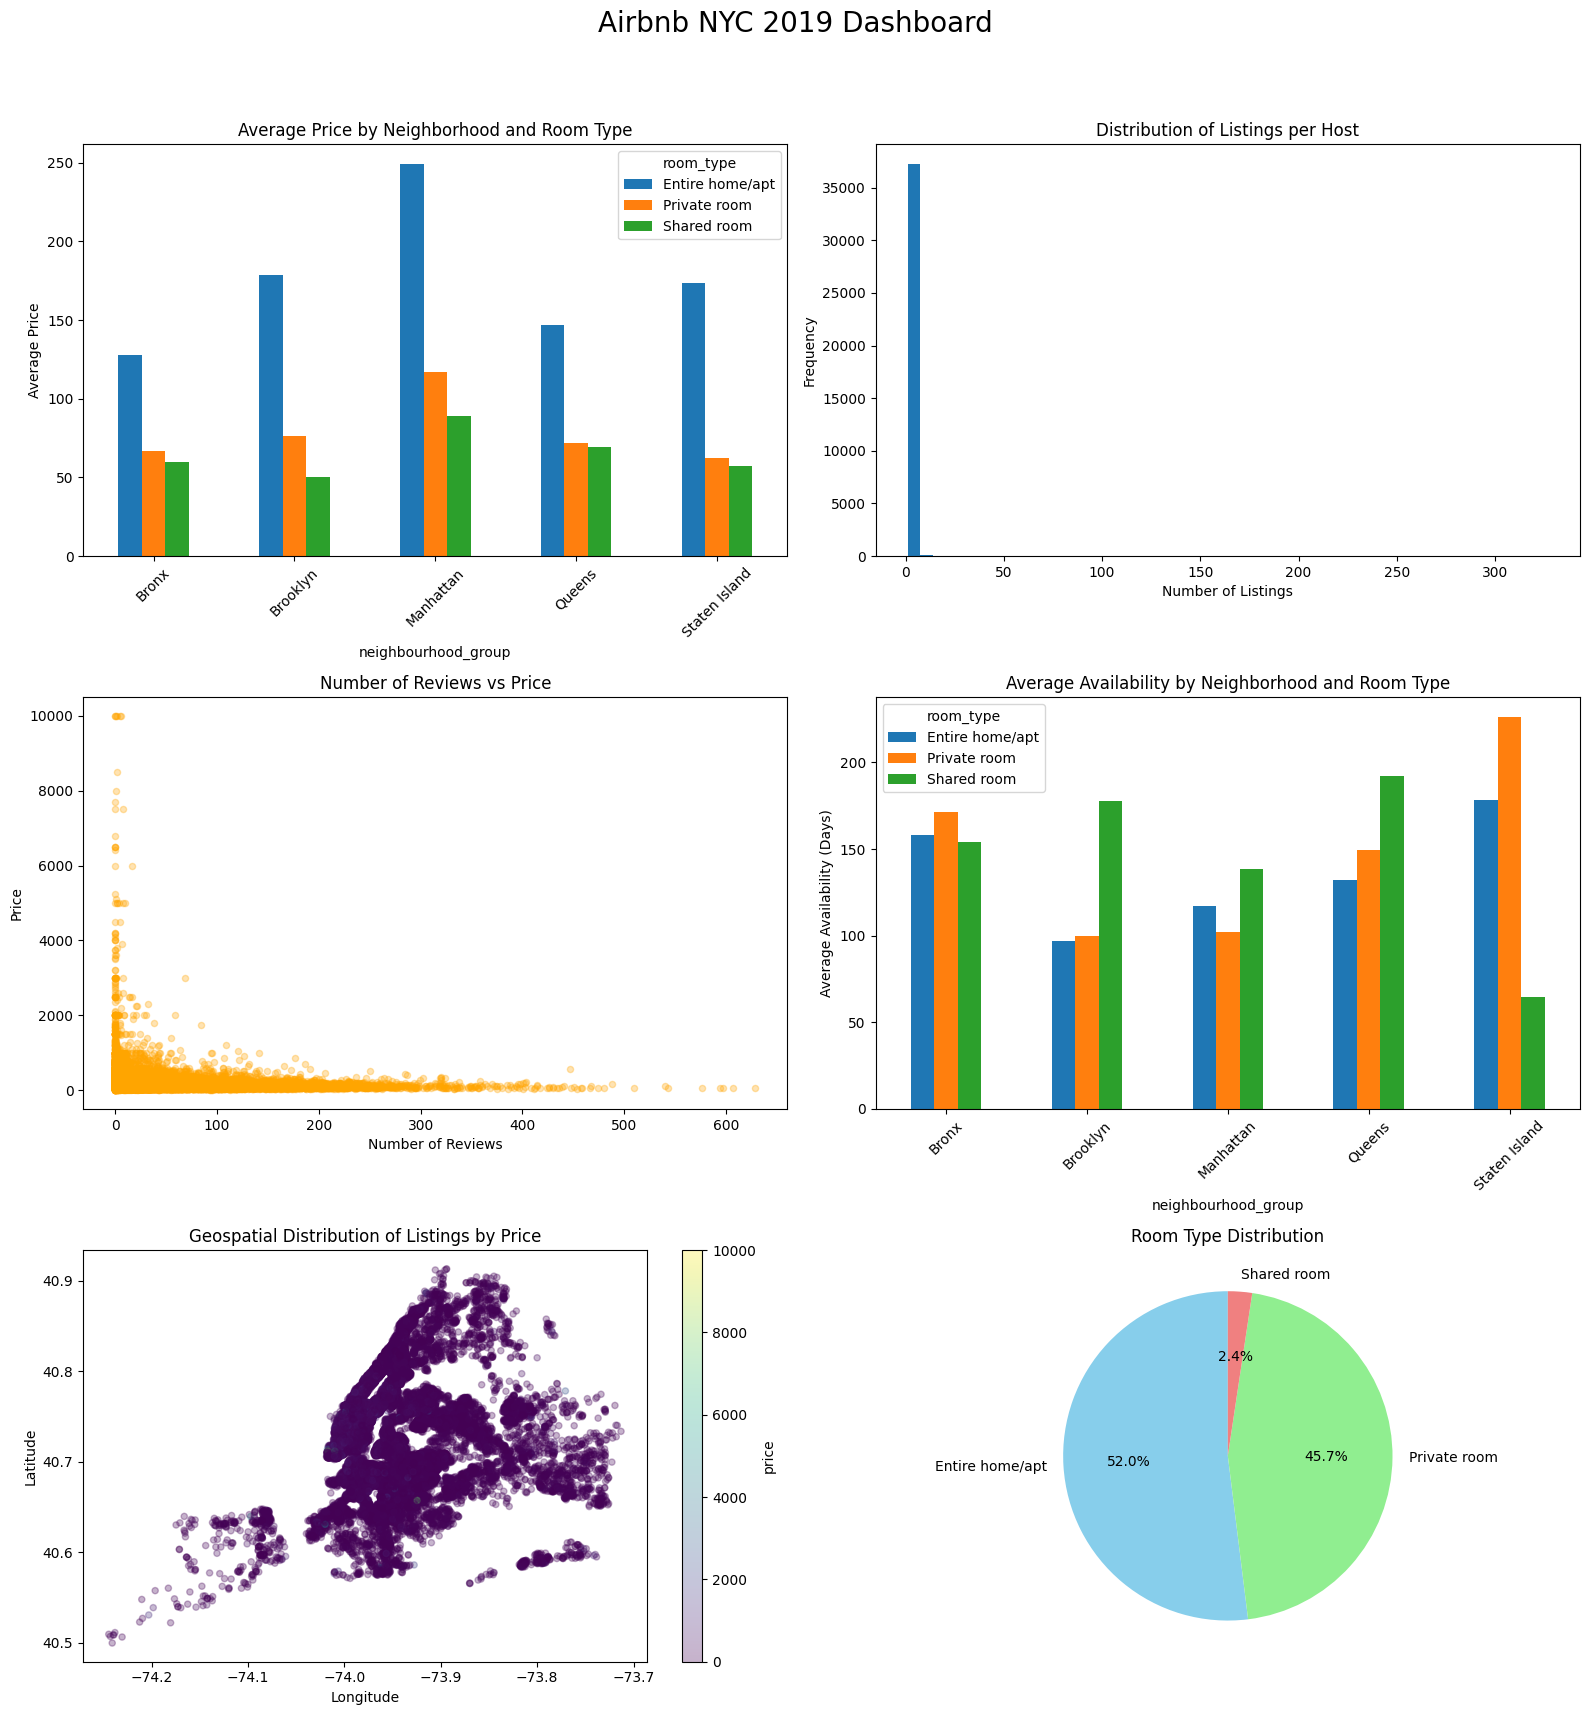

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset again for fresh data
file_path = '/mnt/data/AB_NYC_2019.csv'
df = pd.read_csv('AB_NYC_2019.csv')

# Create a figure for the dashboard
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Airbnb NYC 2019 Dashboard', fontsize=20)

# 1. Price Analysis by Neighborhood and Room Type (Bar Plot)
price_by_neighborhood_room = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()
price_by_neighborhood_room.plot(kind='bar', ax=axs[0, 0], title='Average Price by Neighborhood and Room Type', legend=True)
axs[0, 0].set_ylabel('Average Price')
axs[0, 0].set_xticklabels(price_by_neighborhood_room.index, rotation=45)

# 2. Host Listings Count (Histogram)
host_listings_count = df.groupby('host_id')['id'].count()
axs[0, 1].hist(host_listings_count, bins=50)
axs[0, 1].set_title('Distribution of Listings per Host')
axs[0, 1].set_xlabel('Number of Listings')
axs[0, 1].set_ylabel('Frequency')

# 3. Relationship Between Reviews and Price (Scatter Plot)
df.plot(kind='scatter', x='number_of_reviews', y='price', alpha=0.3, ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Number of Reviews vs Price')
axs[1, 0].set_xlabel('Number of Reviews')
axs[1, 0].set_ylabel('Price')

# 4. Average Availability by Neighborhood and Room Type (Bar Plot)
availability_by_neighborhood_room = df.groupby(['neighbourhood_group', 'room_type'])['availability_365'].mean().unstack()
availability_by_neighborhood_room.plot(kind='bar', ax=axs[1, 1], title='Average Availability by Neighborhood and Room Type')
axs[1, 1].set_ylabel('Average Availability (Days)')
axs[1, 1].set_xticklabels(availability_by_neighborhood_room.index, rotation=45)

# 5. Geospatial Distribution of Listings (Scatter Plot)
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, ax=axs[2, 0], c='price', cmap='viridis', colorbar=True)
axs[2, 0].set_title('Geospatial Distribution of Listings by Price')
axs[2, 0].set_xlabel('Longitude')
axs[2, 0].set_ylabel('Latitude')

# 6. Pie Chart: Room Type Distribution
room_type_counts = df['room_type'].value_counts()
axs[2, 1].pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
axs[2, 1].set_title('Room Type Distribution')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
